,Unnamed: 0,match_id,p1_ace,p1_winner,p1_double_fault,p1_unf_err,p1_net_pt,p1_server,player1_strength,p1_distance_run_normal,player1_dist,p1_victor
291,291,2023-wimbledon-1301,0,1,0,0,0,0,0.523973,-0.562433,0.555661,1
292,292,2023-wimbledon-1301,0,0,0,1,0,1,0.522184,1.636658,0.577159,0
293,293,2023-wimbledon-1301,0,0,0,0,1,1,0.523810,0.192166,0.451626,1
294,294,2023-wimbledon-1301,0,1,0,0,0,1,0.525424,1.016881,0.429253,1
295,295,2023-wimbledon-1301,0,0,0,0,1,1,0.523649,-0.293383,0.519741,0
296,296,2023-wimbledon-1301,0,0,0,0,0,1,0.521886,2.839896,0.471159,0
297,297,2023-wimbledon-1301,0,0,0,0,0,1,0.523490,-0.885441,0.576718,1
298,298,2023-wimbledon-1301,0,0,0,0,0,1,0.525084,-0.126765,0.273923,1
299,299,2023-wimbledon-1301,0,0,0,0,0,1,0.526667,-0.758624,0.366262,1
300,300,2023-wimbledon-1302,0,0,0,0,0,0,1.000000,-0.026409,0.720524,1


In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
df=pd.read_csv('./player_12.csv')
df_cleaned=df.dropna()

# 假设df是你的DataFrame
# X是前9列特征，y是最后一列目标
X = df_cleaned.iloc[:, 2:-1]
y = df_cleaned.iloc[:, -1]

# 将数据划分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X.iloc[300:]
X_test=X.iloc[0:300]
y_train=y.iloc[300:]
y_test=y.iloc[:300]

# 创建并训练逻辑回归模型
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# 在测试集上进行预测和获取概率
y_pred = logistic_regression.predict(X_test)
class_probabilities = logistic_regression.predict_proba(X_test)

# 输出模型评估指标
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report_output)

# 输出逻辑回归的概率
for i in range(len(X_test)):
    print(f"True Label: {y_test.iloc[i]}, Predicted Label: {y_pred[i]}, Class Probabilities: {class_probabilities[i]}")
    print(X_test.iloc[i])

Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       142
           1       0.80      0.70      0.75       158

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300

True Label: 0, Predicted Label: 0, Class Probabilities: [9.99717331e-01 2.82668983e-04]
p1_ace                    0.000000
p1_winner                 0.000000
p1_double_fault           0.000000
p1_unf_err                1.000000
p1_net_pt                 0.000000
p1_server                 1.000000
player1_strength          0.000000
p1_distance_run_normal   -0.593118
player1_dist              0.433526
Name: 0, dtype: float64
True Label: 1, Predicted Label: 1, Class Probabilities: [0.27398872 0.72601128]
p1_ace                    0.000000
p1_winner                 0.000000
p1_double_fault           0.000000
p1_unf_err           

In [186]:
logistic_regression.coef_

array([[ 0.48368705,  5.78146883, -0.6493864 , -6.11647189, -0.02009789,
         1.71926865,  6.04198051,  0.01444972, -1.08532222]])

In [187]:
df.columns

Index(['Unnamed: 0', 'match_id', 'p1_ace', 'p1_winner', 'p1_double_fault',
       'p1_unf_err', 'p1_net_pt', 'p1_server', 'player1_strength',
       'p1_distance_run_normal', 'player1_dist', 'p1_victor'],
      dtype='object')

In [188]:
len(df[(df['p1_victor']==0) & (df['p1_server'])==1])

2381

In [189]:
print(len(df[(df['p1_victor'] ==1) & (df['p1_server'] == 0)][['p1_server','p1_server']]))
print(len(df[(df['p1_victor'] ==0) & (df['p1_server'] == 0)][['p1_server','p1_server']]))



2381
4903


In [190]:
# np.log(probability*10+1)

In [191]:
df_row=pd.read_csv('./cleaned_N01.csv')
df_row

,Unnamed: 0,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,...,player1_dist,player2_dist,player1_strength,player2_strength,p1_server,p2_server,p1_distance_run_normal,p2_distance_run_normal,p1_victor,p2_victor
0,0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,...,0.433526,0.566474,0.000000,1.000000,1,0,-0.593118,-0.443108,0,1
1,1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,...,0.425447,0.574553,0.500000,0.500000,1,0,-0.648485,-0.497934,1,0
2,2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,...,0.410617,0.589383,0.333333,0.666667,1,0,-0.014995,0.436458,0,1
3,3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,...,0.403254,0.596746,0.500000,0.500000,1,0,2.750213,4.539066,1,0
4,4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,...,0.443912,0.556088,0.600000,0.400000,1,0,-0.989725,-0.959544,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:39:58,5,10,330,2,2,...,0.431070,0.568930,0.500000,0.500000,1,0,1.824623,2.726725,1,0
7280,7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:40:43,5,10,331,2,2,...,0.387050,0.612950,0.501511,0.498489,1,0,0.261689,1.021317,1,0
7281,7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:20,5,10,332,2,2,...,0.372544,0.627456,0.500000,0.500000,1,0,-0.231272,0.327688,0,1
7282,7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:52,5,10,333,2,2,...,0.428269,0.571731,0.501502,0.498498,1,0,-0.452812,-0.244897,1,0


In [192]:
df_row_1=df_row[df_row['match_id']=='2023-wimbledon-1301']
df_row_1['player1_dist'] = df_row_1['player1_dist'].fillna(0.5)
df_row_1['player2_dist'] = df_row_1['player2_dist'].fillna(0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4576\1911304982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row_1['player1_dist'] = df_row_1['player1_dist'].fillna(0.5)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4576\1911304982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row_1['player2_dist'] = df_row_1['player2_dist'].fillna(0.5)


In [206]:
import numpy as np
temp=np.array(df.columns)
player1=df_row_1[temp]
temp=[s.replace('1', '2') if '1' in s else s for s in temp]
player2=df_row_1[temp]
player2.columns=player1.columns

player1['performance']=logistic_regression.predict_proba(player1.iloc[:,2:-1])[:,1]
player2['performance']=logistic_regression.predict_proba(player2.iloc[:,2:-1])[:,1]

temp_1=player1['performance']*player1['p1_server']*2381/(2381+4903)
temp_2=player1['performance']*(1-player1['p1_server'])*4903/(2381+4903)
player1['performance']=temp_1+temp_2
player1['performance']=np.log(player1['performance']*10+1)

temp_1=player2['performance']*player2['p1_server']*2381/(2381+4903)
temp_2=player2['performance']*(1-player2['p1_server'])*4903/(2381+4903)
player2['performance']=temp_1+temp_2
player2['performance']=np.log(player2['performance']*10+1)

0      0.000092
1      0.237319
2      0.000714
3      0.326528
4      0.326749
         ...   
295    0.238973
296    0.245704
297    0.235640
298    0.256766
299    0.251114
Length: 300, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4576\857774421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player1['performance']=logistic_regression.predict_proba(player1.iloc[:,2:-1])[:,1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4576\857774421.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player2['performance']=logistic_regression.predict_proba(player2.iloc[:,2:-1])[:,1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4576\857774421.py:14: SettingWithCopyWarning: 
A value is trying to be set 

In [211]:
temp_1+temp_2

0      0.601375
1      0.193952
2      0.353367
3      0.197924
4      0.123270
         ...   
295    0.188717
296    0.667887
297    0.196213
298    0.156604
299    0.164299
Length: 300, dtype: float64

In [212]:
player1['performance'][:5]

0    0.000924
1    1.215859
2    0.007118
3    1.450507
4    1.451027
Name: performance, dtype: float64

In [213]:
player2['performance'][:5]

0    1.947872
1    1.078245
2    1.511532
3    1.091668
4    0.803211
Name: performance, dtype: float64

In [197]:
pd.DataFrame({'performance1':player1['performance'],
              'performance2':player2['performance']}).T.to_csv('performance.csv')

In [214]:
p1_current_per=[]
p2_current_per=[]
p1_overall_per=[]
p2_overall_per=[]
maximum_pt=np.log((4803/(2381+4803))*10+1)

p1_current_per.append(player1['performance'][0])
p1_current_per.append((player1['performance'][0]+player1['performance'][1])/(2*maximum_pt))
p2_current_per.append(player2['performance'][0])
p2_current_per.append((player2['performance'][0]+player2['performance'][1])/(2*maximum_pt))
p1_overall_per.append(player2['performance'][0])
p2_overall_per.append(player2['performance'][0])


for i in range(len(player2)-2):
    p1_current_per.append((player1['performance'][i]+player1['performance'][i+1]+player1['performance'][i+2])/(3*maximum_pt))
    p2_current_per.append((player2['performance'][i]+player2['performance'][i+1]+player2['performance'][i+2])/(3*maximum_pt))
    

for i in range(len(player2)-1):
    p1_overall_per.append((player1['performance'][i+1]/(maximum_pt*(i+2))
                           +p1_overall_per[-1]*((i+1)/(i+2))))
    p2_overall_per.append((player2['performance'][i+1]/(maximum_pt*(i+2))
                           +p2_overall_per[-1]*((i+1)/(i+2))))



In [215]:
# # np.array([p1_current_per,p2_current_per]).T
# def softmax(x):
#     # 对每行进行softmax操作
#     exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
#     softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)
#     return softmax_x
# result = softmax(np.array([p1_current_per, p2_current_per]).T)
# p1_current_per, p2_current_per = result[:, 0], result[:, 1]
# result = softmax(np.array([np.array(p1_overall_per),np.array(p2_overall_per)]).T)
# p1_overall_per, p2_overall_per = result[:, 0], result[:, 1]

# p1_current_per=softmax(np.array([p1_current_per,p2_current_per]).T)[:,0]
# p2_current_per=softmax(np.array([p1_current_per,p2_current_per]).T)[:,1]
# p1_overall_per=softmax(np.array([p1_overall_per,p2_overall_per]).T)[:,0]
# p2_overall_per=softmax(np.array([p1_overall_per,p2_overall_per]).T)[:,1]

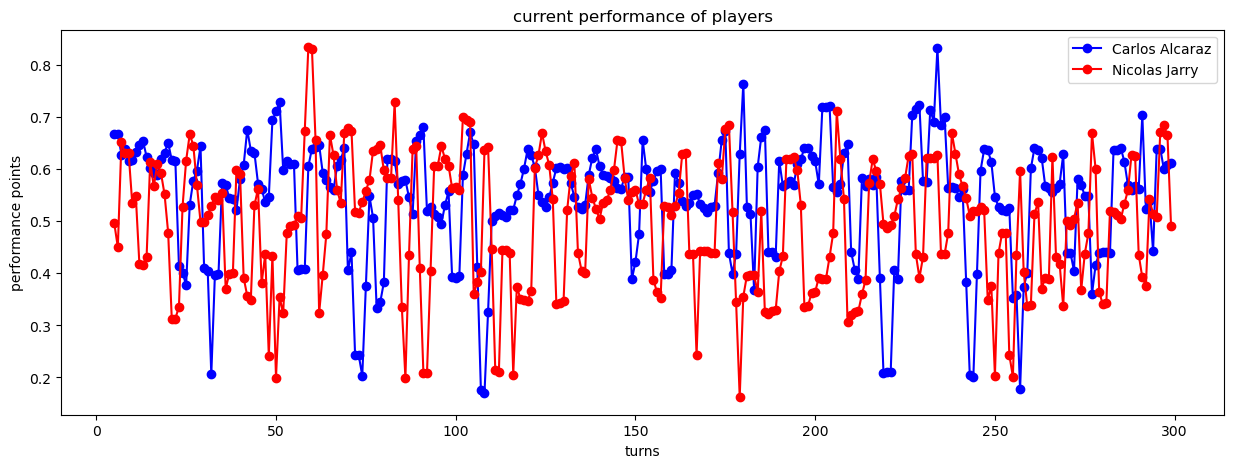

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
p1_current_per

# 获取数组长度
x = np.arange(len(p1_current_per))

# 绘制折线图
plt.figure(figsize=(15,5))
plt.plot(x[5:], p1_current_per[5:], marker='o', linestyle='-', color='b', label='Carlos Alcaraz')
plt.plot(x[5:], p2_current_per[5:], marker='o', linestyle='-', color='r', label='Nicolas Jarry')

# 添加标签和标题
plt.xlabel('turns')
plt.ylabel('performance points')
plt.title('current performance of players')

# 添加图例
plt.legend()

# 显示图形
plt.show()

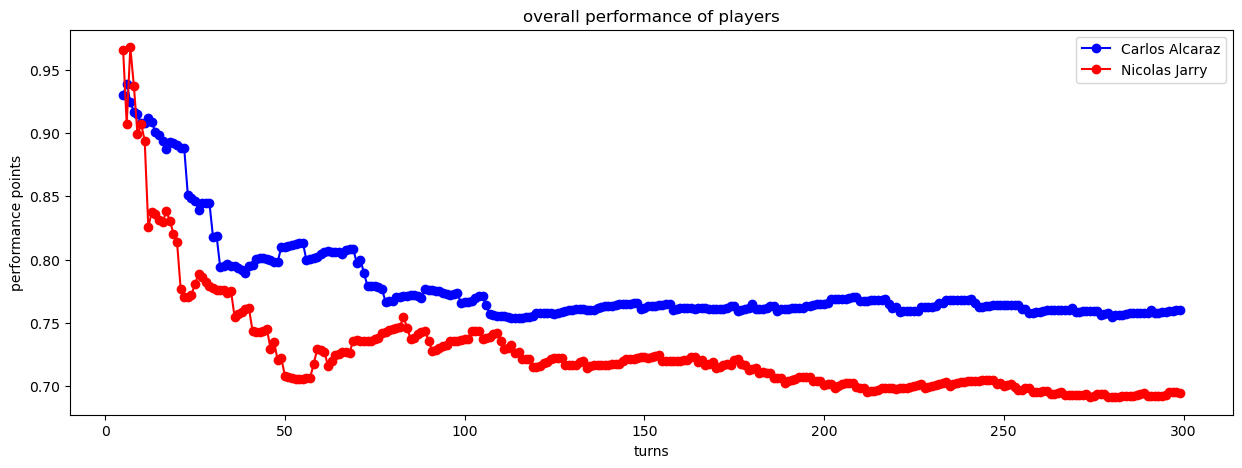

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
p1_current_per

# 获取数组长度
x = np.arange(len(p1_current_per))

# 绘制折线图
plt.figure(figsize=(15,5))
plt.plot(x[5:], p1_overall_per[5:], marker='o', linestyle='-', color='b', label='Carlos Alcaraz')
plt.plot(x[5:], p2_overall_per[5:], marker='o', linestyle='-', color='r', label='Nicolas Jarry')

# 添加标签和标题
plt.xlabel('turns')
plt.ylabel('performance points')
plt.title('overall performance of players')

# 添加图例
plt.legend()

# 显示图形
plt.show()

In [175]:
p1_overall_per[-1]

0.7606721575732196

In [176]:
np.mean(p1_current_per)

0.7517788971984066

In [177]:
p2_overall_per[-1]

0.6953720557892915

In [178]:
np.mean(p2_current_per)

0.6972789326887554

In [205]:
maximum_pt

1.4619373063652448